---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [1]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [2]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Cost,Item Purchased,Name,Date
Store 1,22.5,Sponge,Chris,December 1
Store 1,2.5,Kitty Litter,Kevyn,January 1
Store 2,5.0,Spoon,Filip,mid-May


In [3]:
df['Delivered'] = True
df

,Cost,Item Purchased,Name,Date,Delivered
Store 1,22.5,Sponge,Chris,December 1,True
Store 1,2.5,Kitty Litter,Kevyn,January 1,True
Store 2,5.0,Spoon,Filip,mid-May,True


In [4]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Cost,Item Purchased,Name,Date,Delivered,Feedback
Store 1,22.5,Sponge,Chris,December 1,True,Positive
Store 1,2.5,Kitty Litter,Kevyn,January 1,True,None
Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [5]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Cost,Item Purchased,Name,Date,Delivered,Feedback
0,Store 1,22.5,Sponge,Chris,December 1,True,Positive
1,Store 1,2.5,Kitty Litter,Kevyn,NaN,True,None
2,Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [6]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [7]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [8]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Sally,Course liasion,Engineering


In [9]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [10]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [11]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [12]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [13]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Idiomatic Pandas: Making Code Pandorable

In [3]:
import pandas as pd
df = pd.read_csv('census.csv')
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


In [4]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [5]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County          50       3         6      1       1   
          Baldwin County          50       3         6      1       3   
          Barbour County          50       3         6      1       5   
          Bibb County             50       3         6      1       7   
          Blount County           50       3         6      1       9   
          Bullock County          50       3         6      1      11   
          Butler County           50       3         6      1      13   
          Calhoun County          50       3         6      1      15   
          Chambers County         50       3         6      1      17   
          Cherokee County         50       3         6      1      19   
          Chilton County          50       3         6      1      21   
          Choctaw County          50       3         6      1      23   
          Clarke County           50       3         6      1      25   
          Clay County             50       3         6      1      27   
          Cleburne County         50       3         6      1      29   
          Coffee County           50       3         6      1      31   
          Colbert County          50       3         6      1      33   
          Conecuh County          50       3         6      1      35   
          Coosa County            50       3         6      1      37   
          Covington County        50       3         6      1      39   
          Crenshaw County         50       3         6      1      41   
          Cullman County          50       3         6      1      43   
          Dale County             50       3         6      1      45   
          Dallas County           50       3         6      1      47   
          DeKalb County           50       3         6      1      49   
          Elmore County           50       3         6      1      51   
          Escambia County         50       3         6      1      53   
          Etowah County           50       3         6      1      55   
          Fayette County          50       3         6      1      57   
          Franklin County         50       3         6      1      59   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County         50       2         3     55     129   
          Washington County       50       2         3     55     131   
          Waukesha County         50       2         3     55     133   
          Waupaca County          50       2         3     55     135   
          Waushara County         50       2         3     55     137   
          Winnebago County        50       2         3     55     139   
          Wood County             50       2         3     55     141   
Wyoming   Albany County           50       4         8     56       1   
          Big Horn County         50       4         8     56       3   
          Campbell County         50       4         8     56       5   
          Carbon County           50       4         8     56       7   
          Converse County         50       4         8     56       9   
          Crook County            50       4         8     56      11   
          Fremont County          50       4         8     56      13   
          Goshen County           50       4         8     56      15   
          Hot Springs County      50       4         8     56      17   
          Johnson County          50       4         8     56      19   
          Laramie County          50       4         8     56      21   
          Lincoln County          50       4         8     56      23   
          Natrona County          50       4         8     56      25   
          Niobrara County         50       4         8     56      27   
          Park County             50       4         8     56      29   
          Platt

In [6]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [8]:
df.apply(min_max, axis=1)

max       min
STNAME    CTYNAME                               
Alabama   Autauga County       55347.0   54660.0
          Baldwin County      203709.0  183193.0
          Barbour County       27341.0   26489.0
          Bibb County          22861.0   22512.0
          Blount County        57776.0   57373.0
          Bullock County       10887.0   10606.0
          Butler County        20944.0   20154.0
          Calhoun County      118437.0  115620.0
          Chambers County      34153.0   33993.0
          Cherokee County      26084.0   25859.0
          Chilton County       43943.0   43665.0
          Choctaw County       13841.0   13170.0
          Clarke County        25767.0   24675.0
          Clay County          13880.0   13456.0
          Cleburne County      15072.0   14921.0
          Coffee County        51211.0   50177.0
          Colbert County       54514.0   54354.0
          Conecuh County       13208.0   12662.0
          Coosa County         11758.0   10724.0
          Covington County     38060.0   37796.0
          Crenshaw County      13963.0   13853.0
          Cullman County       82005.0   80374.0
          Dale County          50358.0   49501.0
          Dallas County        43803.0   41131.0
          DeKalb County        71387.0   70869.0
          Elmore County        81468.0   79465.0
          Escambia County      38309.0   37784.0
          Etowah County       104442.0  103057.0
          Fayette County       17231.0   16759.0
          Franklin County      31734.0   31507.0
...                                ...       ...
Wisconsin Washburn County      15930.0   15552.0
          Washington County   133674.0  131967.0
          Waukesha County     396488.0  390076.0
          Waupaca County       52422.0   51945.0
          Waushara County      24581.0   24033.0
          Winnebago County    169639.0  167059.0
          Wood County          74807.0   73435.0
Wyoming   Albany County        37956.0   36428.0
          Big Horn County      12022.0   11672.0
          Campbell County      49220.0   46244.0
          Carbon County        15856.0   15559.0
          Converse County      14343.0   13728.0
          Crook County          7444.0    7114.0
          Fremont County       41129.0   40222.0
          Goshen County        13666.0   13383.0
          Hot Springs County    4846.0    4741.0
          Johnson County        8636.0    8552.0
          Laramie County       97121.0   92271.0
          Lincoln County       18722.0   17943.0
          Natrona County       82178.0   75472.0
          Niobrara County       2548.0    2475.0
          Park County          29237.0   28259.0
          Platte County         8812.0    8678.0
          Sheridan County      30020.0   29146.0
          Sublette County      10418.0    9899.0
          Sweetwater County    45162.0   43593.0
          Teton County         23125.0   21297.0
          Uinta County         21102.0   20822.0
          Washakie County       8545.0    8316.0
          Weston County         7234.0    7065.0

[3142 rows x 2 columns]

In [10]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [11]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']

df.apply(lambda x: np.max(x[rows]), axis=1)

STNAME     CTYNAME           
Alabama    Autauga County         55347.0
           Baldwin County        203709.0
           Barbour County         27341.0
           Bibb County            22861.0
           Blount County          57776.0
           Bullock County         10887.0
           Butler County          20944.0
           Calhoun County        118437.0
           Chambers County        34153.0
           Cherokee County        26084.0
           Chilton County         43943.0
           Choctaw County         13841.0
           Clarke County          25767.0
           Clay County            13880.0
           Cleburne County        15072.0
           Coffee County          51211.0
           Colbert County         54514.0
           Conecuh County         13208.0
           Coosa County           11758.0
           Covington County       38060.0
           Crenshaw County        13963.0
           Cullman County         82005.0
           Dale County            50358.0
    

# Group by

In [21]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901
10,50,3,6,1,19,Alabama,Cherokee County,25989,25986,25976,...,6.339327,1.113180,5.488706,-0.076806,-3.239866,6.416167,1.420264,5.757384,0.230419,-2.931307


In [22]:
%%timeit -n 10
for state in df['STNAME'].unique():
    #print(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    #print(state, avg)
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in stat

In [23]:
%%timeit -n 10
for group,frame in df.groupby('STNAME'):
    ##print('group:',group)
    #print('frame:',frame)
    #print(group, frame['CENSUS2010POP'])
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in stat

In [24]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [25]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [26]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [27]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [28]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.DataFrameGroupBy'>
<class 'pandas.core.groupby.SeriesGroupBy'>


In [29]:
print(df.groupby('STNAME').agg('sum'))

                      SUMLEV  REGION  DIVISION  STATE  COUNTY  CENSUS2010POP  \
STNAME                                                                         
Alabama                 3350     201       402     67    4489        4779736   
Alaska                  1450     116       261     58    4340         710231   
Arizona                  750      60       120     60     208        6392017   
Arkansas                3750     225       525    375    5625        2915918   
California              2900     232       522    348    3364       37253956   
Colorado                3200     256       512    512    3983        5029196   
Connecticut              400       8         8     72      64        3574097   
Delaware                 150       9        15     30       9         897934   
District of Columbia      50       3         5     11       1         601723   
Florida                 3350     201       335    804    4550       18801310   
Georgia                 7950     477    

In [30]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [31]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))

avg                             sum  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433    71658.328358         4785161   
Alaska                  24621.413793    24921.379310          714021   
Arizona                427213.866667   431248.800000         6408208   
Arkansas                38965.253333    39180.506667         2922394   
California             643691.017241   650000.586207        37334079   
Colorado                78878.968750    79991.875000         5048254   
Connecticut            447464.625000   448719.875000         3579717   
Delaware               299930.333333   302638.666667          899791   
District of Columbia   605126.000000   620472.000000          605126   
Florida                281341.641791   285157.208955        18849890   
Georgia                 61090.905660    61712.452830         9713454   
Hawaii                 272796.000000   275645.400000         1363980   
Idaho                   35704.227273    36003.045455         1570986   
Illinois               125894.598039   126096.882353        12841249   
Indiana                 70549.891304    70835.271739         6490590   
Iowa                    30815.090909    30963.525253         3050694   
Kansas                  27226.895238    27332.542857         2858824   
Kentucky                36232.808333    36399.016667         4347937   
Louisiana               71014.859375    71490.328125         4544951   
Maine                   82980.937500    83016.062500         1327695   
Maryland               241183.708333   243507.125000         5788409   
Massachusetts          468931.142857   472271.214286         6565036   
Michigan               119004.445783   118995.048193         9877369   
Minnesota               61044.862069    61472.632184         5310903   
Mississippi             36223.365854    36317.060976         2970316   
Missouri                52139.582609    52265.973913         5996052   
Montana                 17690.053571    17816.892857          990643   
Nebraska                19677.688172    19810.569892         1830025   
Nevada                 159025.882353   159930.529412         2703440   
New Hampshire          131670.800000   131834.400000         1316708   
New Jersey             419232.428571   421092.095238         8803881   
New Mexico              62567.909091    62976.545455         2064741   
New York               312950.322581   314890.354839        19402920   
North Carolina          95589.790000    96510.250000         9558979   
North Dakota            12726.981132    12930.679245          674530   
Ohio                   131145.068182   131198.204545        11540766   
Oklahoma                48825.922078    49176.961039         3759596   
Oregon                 106610.333333   107458.583333         3837972   
Pennsylvania           189731.552239   190226.895522        12712014   
Rhode Island           210643.800000   210371.200000         1053219   
South Carolina         100780.304348   101581.152174         4635894   
South Dakota            12368.166667    12489.227273          816299   
Tennessee               66911.421053    67351.663158         6356585   
Texas                   99387.255906   101001.826772        25244363   
Utah                    95704.344828    97118.620690         2775426   
Vermont                 44713.142857    44763.357143          625984   
Virginia                60344.263158    60983.330827         8025787   
Washington             172898.974359   174954.589744         6743060   
West Virginia           33713.181818    33726.327273         1854225   
Wisconsin               79030.611111    79301.666667         5690204   
Wyoming                 24544.173913    24685.565217          564516   

                                      
                     POPESTIMATE2011  
STNAME                                
Alabama                    

In [32]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916
District of Columbia,605126.000000,620472


# Scales

In [33]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [34]:
#df['Grades'].head()
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [35]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [36]:
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [37]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
#df
pd.cut(df['avg'],10)

STNAME
Alabama                  (11706.0871, 75333.413]
Alaska                   (11706.0871, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                 (11706.0871, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                  (11706.0871, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                    (11706.0871, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                  (11706.0871, 75333.413]
Iowa                     (11706.0871, 75333.413]
Kansas                   (11706.0871, 75333.413]
Kentucky                 (11706.0871, 75333.413]
Louisiana                (11706.0871, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

# Pivot Tables

In [38]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [39]:
df

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,n/a,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7
5,2013,SMART,FORTWO ELECTRIC DRIVE CABRIOLET,TWO-SEATER,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,0,n/a,109,8
6,2013,SMART,FORTWO ELECTRIC DRIVE COUPE,TWO-SEATER,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,0,n/a,109,8
7,2013,TESLA,MODEL S (40 kWh battery),FULL-SIZE,270,A1,B,22.4,21.9,22.2,2.5,2.5,2.5,0,n/a,224,6
8,2013,TESLA,MODEL S (60 kWh battery),FULL-SIZE,270,A1,B,22.2,21.7,21.9,2.5,2.4,2.5,0,n/a,335,10
9,2013,TESLA,MODEL S (85 kWh battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,n/a,426,12


In [40]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [41]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

            
Make   All  
YEAR        
2012  49.0  
2013  35.0  
2014  35.0  
2015  35.0  
2016  35.0  
All   35.0

# Date Functionality in Pandas

In [42]:
import pandas as pd
import numpy as np

### Timestamp

In [43]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [44]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [45]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [46]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [47]:
type(t1.index)

pandas.tseries.index.DatetimeIndex

### PeriodIndex

In [48]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [49]:
type(t2.index)

pandas.tseries.period.PeriodIndex

### Converting to Datetime

In [50]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,27,86
"Aug 29, 2014",75,45
2015-06-26,31,72
7/12/16,91,68


In [51]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,27,86
2014-08-29,75,45
2015-06-26,31,72
2016-07-12,91,68


In [52]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [53]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [54]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [55]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [56]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,105,129
2016-10-16,110,125
2016-10-30,110,127
2016-11-13,115,127
2016-11-27,115,122
2016-12-11,116,117
2016-12-25,122,119
2017-01-08,128,121
2017-01-22,136,118


In [57]:
df.index.weekday_name

array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

In [58]:
df.diff() # the difference between the row 2 and row 1

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,5.0,-4.0
2016-10-30,0.0,2.0
2016-11-13,5.0,0.0
2016-11-27,0.0,-5.0
2016-12-11,1.0,-5.0
2016-12-25,6.0,2.0
2017-01-08,6.0,2.0
2017-01-22,8.0,-3.0


In [59]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,108.333333,127.0
2016-11-30,115.000000,124.5
2016-12-31,119.000000,118.0
2017-01-31,132.000000,119.5


In [60]:
df['2017']

,Count 1,Count 2
2017-01-08,128,121
2017-01-22,136,118


In [61]:
df['2016-12']

,Count 1,Count 2
2016-12-11,116,117
2016-12-25,122,119


In [62]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,116,117
2016-12-25,122,119
2017-01-08,128,121
2017-01-22,136,118


In [63]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,105,129
2016-10-09,105,129
2016-10-16,110,125
2016-10-23,110,125
2016-10-30,110,127
2016-11-06,110,127
2016-11-13,115,127
2016-11-20,115,127
2016-11-27,115,122
2016-12-04,115,122


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


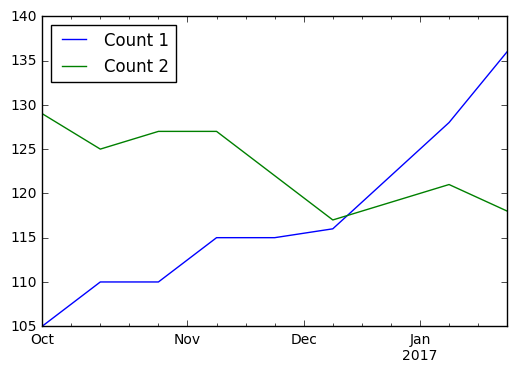

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()